## MNIST Fashion Data and Multi-Class Classification 

In [9]:
import tensorflow as tf
from tensorflow import keras
print ("tensorflow version: ", tf.__version__)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tensorflow version:  1.14.0


#### Load the MNIST Data from Keras API. 
Check [Keras Dataset](https://keras.io/datasets/) page for a short tutorial. 
Since we will use only tensorflow, check the [TensorFlow](https://www.tensorflow.org/tutorials/keras/basic_classification) page for loading and using the data.  

In [2]:
mnist_fashion = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist_fashion.load_data()

#### Study the Shape of the Images and Labels 

In [7]:
print ("training data shape: ", X_train.shape)
print ("training label shape: ", y_train.shape)
print ("test data shape: ", X_test.shape)
print ("test label shape: ", y_test.shape)
print ("type of data:", type(X_train))sgd'
print ("type of labels:", type(y_test))

training data shape:  (60000, 28, 28)
training label shape:  (60000,)
test data shape:  (10000, 28, 28)
test label shape:  (10000,)
type of data: <class 'numpy.ndarray'>
type of labels: <class 'numpy.ndarray'>


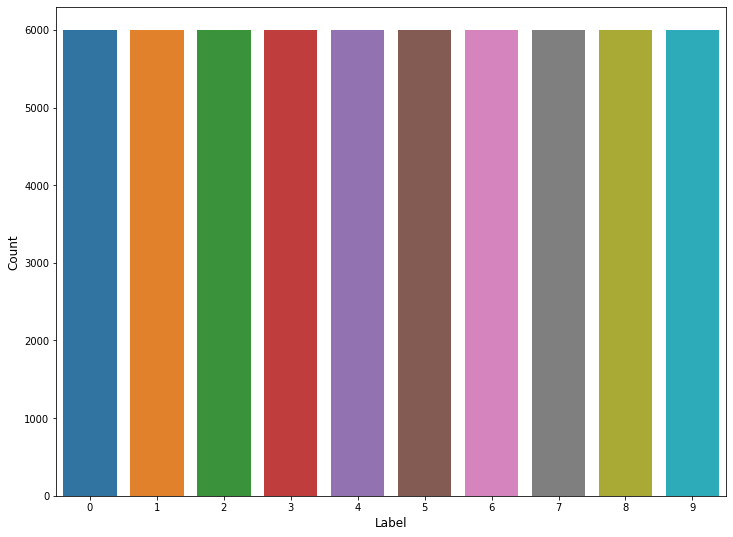

In [21]:
#check the countplot
fig = plt.figure(figsize=(12, 9))
sns.countplot(y_train)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Label and Class for the Fashion Dataset**

|Label | Class|
|---|---|
|0| Top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle Boot|

In [24]:
class_list=['Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot'] 

In [20]:
# labels are uniformly distributed
list(y_test.flatten()).count(5) # change the number from 0 to 9 to see 

1000

#### Let's Check one of the training images

It's a:  Bag


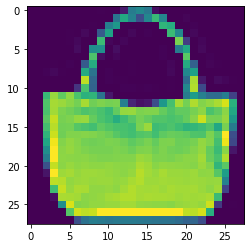

In [26]:
plt.imshow(X_train[100])
print ("It's a: ", class_list[y_train[100]])

#### Normalize the Pixels
Since the pixel values are number between 0 and 255, it is better if we normalize the values between 0 and 1 and it is considered as one of the most important image _pre-processing_ steps. 

In [27]:
X_train = X_train/255.0
X_test = X_test/255.

### Model Instance in Keras, Create the Neural Net

In the ast simplest example possible, we saw a neural net with one layer, one node and one input, and that was good enough for simple linear regression tasks. But here the data set is huge and the problem is rather complex, so we create our first neural network with one hidden layer, the hidden layer is **Dense**, i.e., every output from previous layer is connected to all the nodes in the dense _(Fully Connected)_ layer.    

In [29]:
model = keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(128, activation=tf.nn.relu), 
                                keras.layers.Dense(10, activation=tf.nn.softmax)])

Let's explain what's happening out there. <br>
* First we flatten the input, i.e. the images. The images are of dimension $28 \times 28$, thus instead of having 28 rows and columns, we will have 784 numbers stacked over each other.

* Dense layer is the hidden layer in our neural net, thus each input is connected to 128 neurons linearly and then the relu activation function is used.

* As this is a multi-class problem, we have used softmax layer in the output. It picks the highest number from the 10 outputs and assign the image to the corresponding label. Important point here is that, last layer contains 10 softmax units, as there are 10 classes in  our dataset. These classes are independent of each other.        

### Compile the Model and Fit the Training Data

In [30]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])


# usually suggested that sparse_categorical_crossentropy to be used when targets are integers, 
# whereas if they are one hot encoded then use categorical_crossentropy 

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.4961 - acc: 0.8265
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.3762 - acc: 0.8640
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3379 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3144 - acc: 0.8837
Epoch 5/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2961 - acc: 0.8906
Epoch 6/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2837 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2695 - acc: 0.9000
Epoch 8/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2589 - acc: 0.9045
Epoch 9/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2497 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 3s 57us/sample - loss: 

So the result suggests that our network is about 91% accurate, let's see how it performs on the test data

In [32]:
test_res = model.evaluate(X_test, y_test)
print ("accuracy of the model on the test data: ", test_res[1])

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3507 - acc: 0.8759
accuracy of the model on the test data:  0.8759


______________________________________________________________________________________________________________

### Some Other Important Points

#### 1. Use Predict Method in Model Class

"Generates output predictions for the input samples."

In [38]:
predict=model.predict(X_test)
# let's see one result 
print (np.argmax(predict[200]), ", this is a:", class_list[np.argmax(predict[200])])
print ("from the test label: ", class_list[y_test[200]])
if class_list[y_test[200]]==class_list[np.argmax(predict[200])]:
    print ("!!! Great Prediction !!!")
else: 
    print ("you need to work on your model :(")

1 , this is a: Trouser
from the test label:  Trouser
Great Prediction


#### 2. Use Callback to Stop Training After a Given Accuracy 

In [40]:
class trycallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print ("\n Loss has gone down below 40%, !!Stopping!!")
            self.model.stop_training = True

            
callbacks = trycallback()
model1 = keras.models.Sequential([keras.layers.Flatten(), 
                                keras.layers.Dense(1024, activation=tf.nn.relu), 
                                keras.layers.Dense(10, activation = tf.nn.softmax)])


model1.compile(optimizer='Adam', loss='sparse_categorical_crossentropy')
model1.fit(X_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 10s 160us/sample - loss: 0.4707
Epoch 2/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.3579
 Loss has gone down below 40%, !!Stopping!!
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3581
